> #### Adam Partl
> ## Bachelor thesis
> # Optimizing the automatic prediction of conversion to mild cognitive impairment using machine learning algorithms

### EDA

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/data.csv', low_memory=False)

Firstly we analyze the structure of the dataset

In [3]:
print(len(df.columns))
print(list(df.columns))

969
['NACCID', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCREFR', 'SEX', 'HISPANIC', 'HISPOR', 'HISPORX', 'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'PRIMLANG', 'PRIMLANX', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NEWINF', 'INHISPOR', 'INHISPOX', 'NACCNINR', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX', 'INRELTOX', 'INKNOWN', 'INVISITS', 'INCALLS', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX', 'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10', 'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18', 'DRUG19', 'DRUG20', 'DRUG21', 'DRUG22', 'DRUG23', 'DRUG24', 'DRUG25', 'DRUG26', 'DRUG27', 'DRUG28', 'DRUG29', 'DRUG30', 'DRUG31', 'DRUG32', 'DRUG33', 'DRUG34', 'DRUG35', 'DRUG36', 'DRUG37', 'DRUG38', 'DRUG39', 'DRUG40', 'TOBAC30', 'TOBAC100', '

As can be seen, the dataset contains 969 columns 

In [4]:
print(df.describe())

            VISITMO      VISITDAY       VISITYR      NACCREFR           SEX  \
count  29673.000000  29673.000000  29673.000000  28889.000000  29673.000000   
mean       6.347555     15.546962   2013.687662      3.262834      1.611802   
std        3.409613      8.607724      6.098801      2.962000      0.487348   
min        1.000000      1.000000   2005.000000      1.000000      1.000000   
25%        3.000000      8.000000   2008.000000      1.000000      1.000000   
50%        6.000000     15.000000   2013.000000      2.000000      2.000000   
75%        9.000000     23.000000   2019.000000      8.000000      2.000000   
max       12.000000     31.000000   2024.000000      8.000000      2.000000   

           HISPANIC       HISPOR          RACE     RACESEC     RACETER  \
count  29541.000000  2752.000000  29458.000000  988.000000  201.000000   
mean       0.095799     4.986555      2.075599    8.094130    7.000000   
std        0.294320    10.269939      6.007969   15.400044   14.37

In [5]:
print(df.describe(exclude=np.number))

            NACCID HISPORX     RACEX  RACESECX RACETERX PRIMLANX INHISPOX  \
count        29673     132       445       116       18      401      113   
unique       29673      68       125        77       16      162       68   
top     NACC995870   Spain  HISPANIC  Hispanic  Mestizo   German    Spain   
freq             1      21        77         8        2       25       13   

         INRACEX INRASECX INRATERX INRELTOX NACCAMX NACCAMSX NACCFMX NACCFMSX  \
count        566      151       32      357    3132     3115    3116     3110   
unique       201       94       31      179      22       11      12        6   
top     HISPANIC   Jewish    Human     self       .        .       .        .   
freq          91       12        2       39    3105     3105    3103     3105   

       NACCOMX NACCOMSX                                DRUG3         DRUG4  \
count     3162     2172                                22292         19399   
unique      53       16                             

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Columns: 969 entries, NACCID to TIME
dtypes: float64(781), int64(53), object(135)
memory usage: 219.4+ MB
None


For the data description we are working with the NACC UDS Resarchers Data Dictionary (https://files.alz.washington.edu/documentation/uds3-rdd.pdf)
Among the most important columns are:
> Cognitive Assessments
- NACCMMSE - Mini-Mental State Examination (MMSE) score
- NACCMOCA - Montreal Cognitive Assesment (MoCA) score
- MEMORY, ORIENT, JUDGMENT - Cognitive function and dementia rating variables

> Neuropsychiatric Symptoms
- DEL, HALL, AGIT, DEPD, ANX, APA, DISN - symptoms related to hallucinations, delusions, agitation, depression, anxiety, apathy, and disinhibition

> Family history and Genetic Risk
- NACCFAM - Family history of cognitive impairment
- NACCAM, NACCFADM - Alzheimer's related genetic mutations

> Functional Activities
- FAQ - BILLS, SHOPPING, STOVE, TRAVEL - decline in daily activities

> Neurological and Physical Exam Findings
- PARKSIGN, GAITDIS, RIGDL, BRADY - Parkinson signs and gait disorders
- CVDCOG, CBSTROKE, CORTDEF - Cerebrovascular disease and cortical deficits

> Health History and Risk Factors
- DIABETES, HYPERTEN, B12DEF, THYROID - common metabolic and vascular risk factors
- TBI - history of traumatic brain injury

> Clinician Judgment
- COGMEM, COGJUDG, COGLAND, COGATTN - Clinician-assessed impairment domains

Firstly we group the data by NACCUDSD - cognitive status assesment after visit (impaired - not MCI, MCI, Normal, Dementia)

In [4]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

grouped = df.groupby('CognitiveStatus')

Now we can analyze selected columns separately based on the cognitive status of the patient
We will start with 
> Cognitive Assessments

In [5]:
invalid_values = [88,95,96,97,98,99,-4]
for col in ['NACCMMSE', 'NACCMOCA']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)
    
for col in ['MEMORY', 'ORIENT', 'JUDGMENT']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
summary_stats = grouped[['NACCMMSE', 'NACCMOCA', 'MEMORY', 'ORIENT', 'JUDGMENT']].describe()
print(summary_stats)

                 NACCMOCA                                                     \
                    count       mean       std   min   25%   50%   75%   max   
CognitiveStatus                                                                
Impaired-Not-MCI    829.0  23.539204  3.791354   5.0  21.0  24.0  26.0  30.0   
MCI                2947.0  22.267730  3.728651   5.0  20.0  23.0  25.0  30.0   
Normal             8508.0  26.210860  2.744770  10.0  25.0  27.0  28.0  30.0   

                   MEMORY                                               \
                    count      mean       std  min  25%  50%  75%  max   
CognitiveStatus                                                          
Impaired-Not-MCI   2250.0  0.322444  0.312989  0.0  0.0  0.5  0.5  3.0   
MCI                6907.0  0.522224  0.256211  0.0  0.5  0.5  0.5  3.0   
Normal            20516.0  0.053324  0.161286  0.0  0.0  0.0  0.0  2.0   

                   ORIENT                                               \


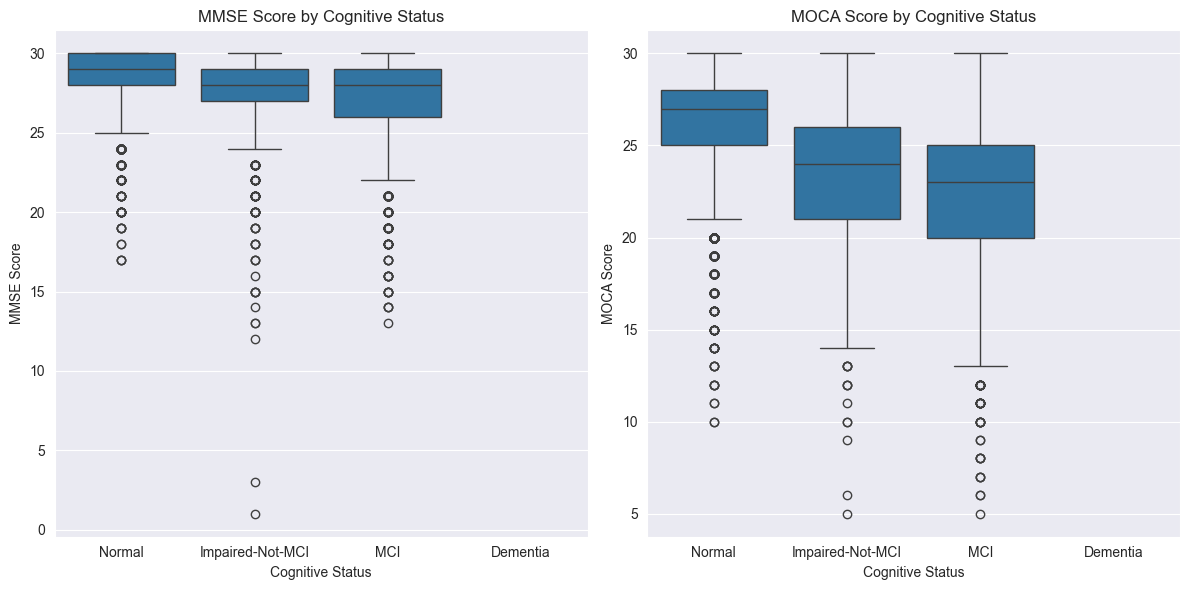

In [7]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='CognitiveStatus', y='NACCMMSE', data=df, order=status_labels.values())
plt.title('MMSE Score by Cognitive Status')
plt.xlabel('Cognitive Status')
plt.ylabel('MMSE Score')

plt.subplot(1,2,2)
sns.boxplot(x='CognitiveStatus', y='NACCMOCA', data=df, order=status_labels.values())
plt.title('MOCA Score by Cognitive Status')
plt.xlabel('Cognitive Status')
plt.ylabel('MOCA Score')

plt.tight_layout()
plt.show()

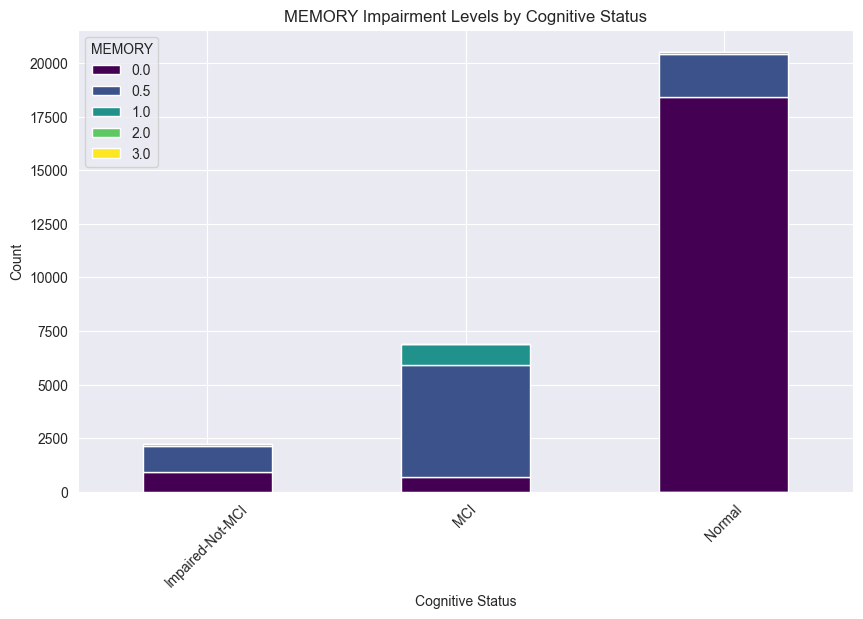

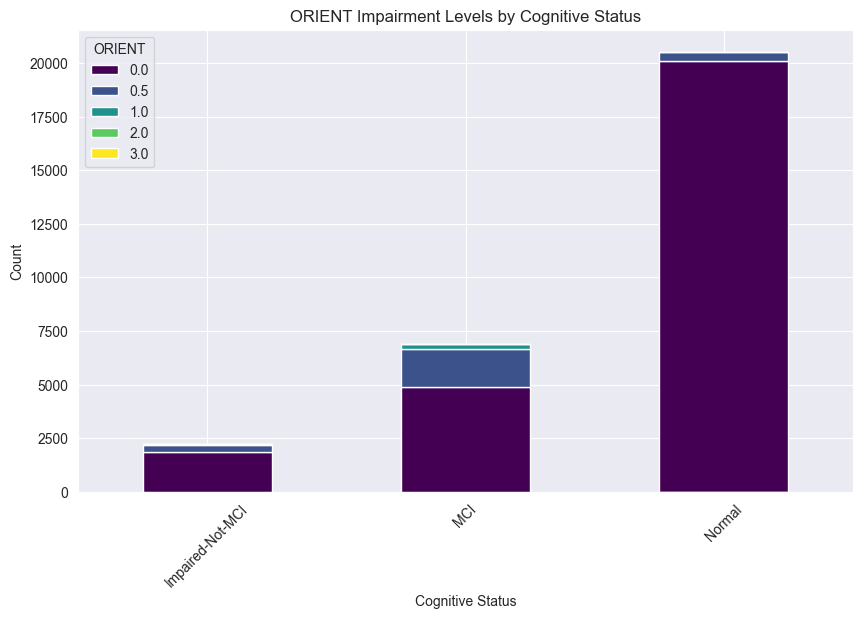

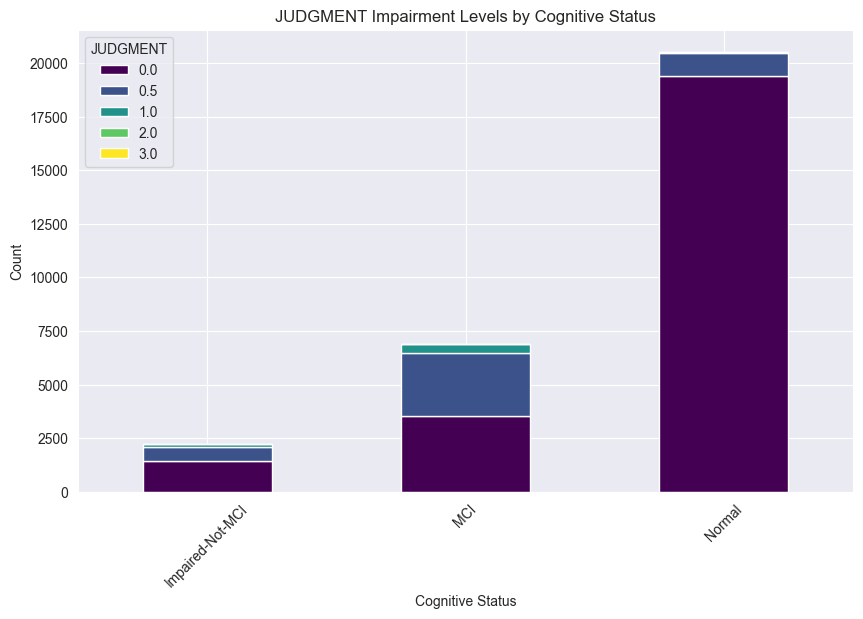

In [8]:
impairment_vars = ['MEMORY', 'ORIENT', 'JUDGMENT']
for var in impairment_vars:
    impairment_counts = df.groupby(['CognitiveStatus', var]).size().unstack()
    impairment_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.title(f"{var} Impairment Levels by Cognitive Status")
    plt.xlabel('Cognitive Status')
    plt.ylabel('Count')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.show()

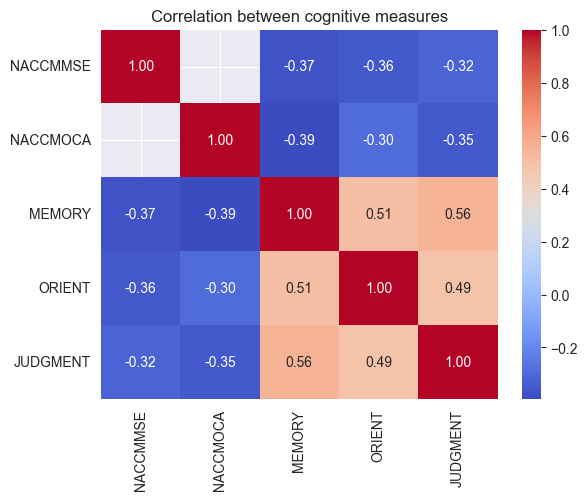

In [9]:
filtered_df = df.dropna(subset=["NACCMMSE", "NACCMOCA"], how='all')
corr = filtered_df[['NACCMMSE', 'NACCMOCA', 'MEMORY', 'ORIENT', 'JUDGMENT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between cognitive measures')
plt.show()

From the data and graphs, we can observe the following:
- NACCMMSE
    -   the mean score is highest for the Normal group, lower for MCI and lowest for Impaired-Not-MCI
    - the standard deviation is volatile
- NACCMOCA
    - the mean score follows similar pattern to the NACCMMSE
    - the standard deviation is consistent across all groups
    - the minimum score of 5 suggest slight cognitive impairment among all groups
- Memory
    - Normal group has the lowest mean impairment, MCI group highest, suggesting frequent memory issues
    - Maximum memory impairment score is present in all groups, but is rare in the Normal group
- Orientation
    - Normal group shows almost no impairment, MCI group is the highest
    - Maximum value is present in all groups, suggesting extreme cases 
- Judgment
    - Normal group has very low score, MCI is the highest
    - Maximum value is present in all groups, suggesting extreme cases 

The correlation matrix suggests, that there is a link between memory, orientation and judgment. Considering the NACCMMSE and NACCMOCA, the strongest correlation is with memory impairment.
              
   

> Neuropshychiatric symptoms

Similarly to earlier we group the data by Cognitive Status

In [10]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

grouped = df.groupby('CognitiveStatus')

In [11]:
invalid_values = [9,-4]
for col in ['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)

In [14]:
binary_counts = df[['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']].sum()
print(binary_counts)

DEL      453.0
HALL     216.0
AGIT    2480.0
DEPD    5304.0
ANX     4126.0
APA     2426.0
DISN    1373.0
dtype: float64


In [13]:
proportions = grouped[['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']].mean()
print(proportions)

                       DEL      HALL      AGIT      DEPD       ANX       APA  \
CognitiveStatus                                                                
Impaired-Not-MCI  0.035900  0.015130  0.149197  0.277541  0.224905  0.146168   
MCI               0.035633  0.018417  0.169912  0.311453  0.258865  0.185816   
Normal            0.007543  0.003323  0.055213  0.141010  0.102908  0.047277   

                      DISN  
CognitiveStatus             
Impaired-Not-MCI  0.105637  
MCI               0.095832  
Normal            0.027433  


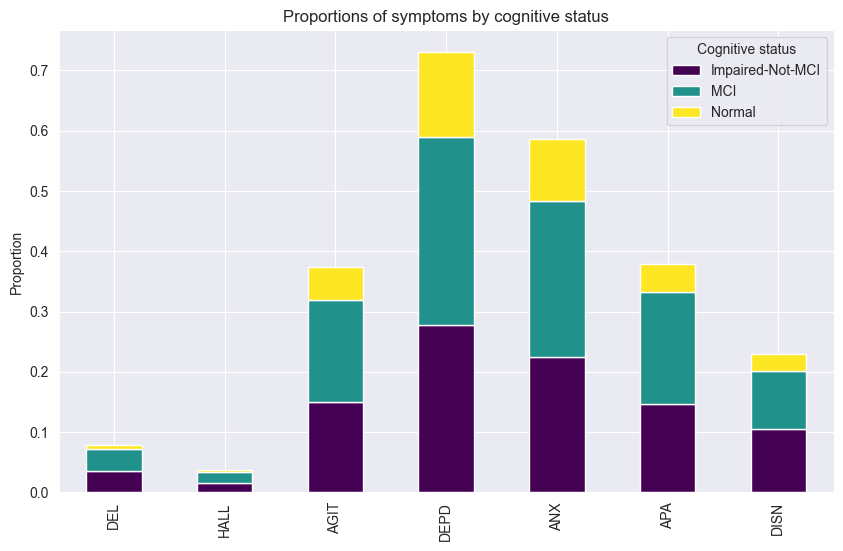

In [16]:
proportions.T.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.ylabel('Proportion')
plt.title("Proportions of symptoms by cognitive status")
plt.legend(title='Cognitive status')
plt.show()

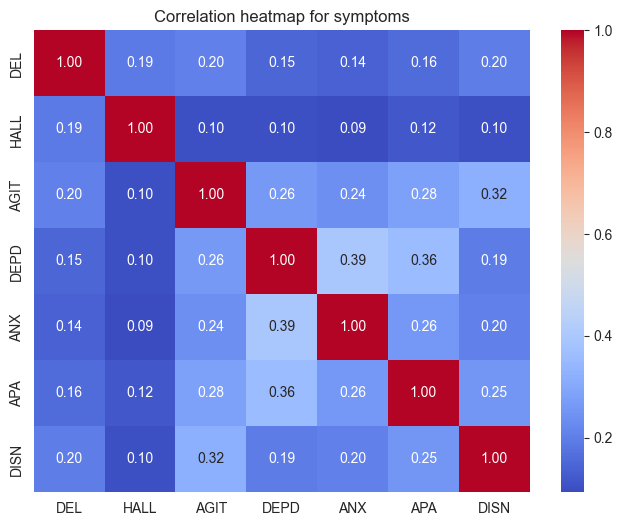

In [18]:
corr = df[['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']].corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap for symptoms')
plt.show()

In [23]:
for col in ['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']:
    contingency_table = pd.crosstab(df[col], df['CognitiveStatus'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}: p-value = {p}")

Chi-Square test for DEL: p-value = 2.5379044549937484e-64
Chi-Square test for HALL: p-value = 2.6573234845306945e-35
Chi-Square test for AGIT: p-value = 3.5833784686156743e-193
Chi-Square test for DEPD: p-value = 1.6102896581161303e-222
Chi-Square test for ANX: p-value = 6.2485988643037326e-226
Chi-Square test for APA: p-value = 7.654347718413558e-276
Chi-Square test for DISN: p-value = 1.0754269936543116e-138


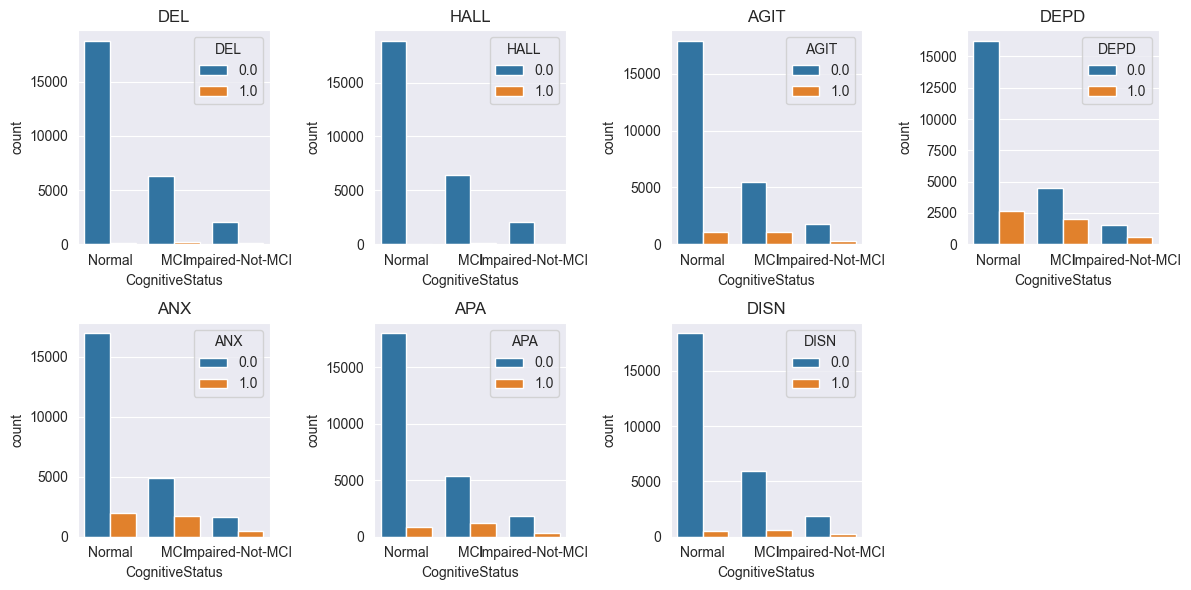

In [24]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['DEL', 'HALL', 'AGIT', 'DEPD', 'ANX', 'APA', 'DISN']):
    plt.subplot(2,4,i+1)
    sns.countplot(x='CognitiveStatus', hue=col, data=df)
    plt.title(col)
    
plt.tight_layout()
plt.show()

From the data and graphs, we can observe the following:
- Symptom Prevalence
    - The occurences of each symptom show that depression (DEPD) and anxiety (ANX) are the most common symptoms, while hallucinations (HALL) and delusions (DEL) are the least frequent
    - Most prevalent is Depression (5304) and leas prevalent is Hallucinations (216)
- Symptom Proportions
    - All symptoms are more common in the MCI an Impaired-Not-MCI groups, compared to Normal
    - Psychotic symptoms (DEl, HALL) are very rare across all groups, but are vastly more represented in MCI and Impaired-Not-MCI groups   
    - Disinhibition and Delusions are highest in Impaired-Not-MCI group, the rest is highest in the MCI group.
- Chi-squared test results:
    - all p-values are < 0.05, which indicates that all symptoms are associated with cognitive status
    - Apathy and Anxiety have the strongest association       
- Correlation Matrix:
    - Most correlations are relatively low, the highest ones are 0.3-0.4 suggesting some associations
    - Depression and Anxiety have the strongest correlation, which suggest that people with depression often also have anxiety
    - Depression also has a strong correlation with apathy
    - Hallucinations and delusions have the weakest correlation, indicating that they are independent  

> Family History and Genetic Risk

In [25]:
df['NACCUDSD'] = pd.to_numeric(df['NACCUDSD'], errors='coerce')
valid_statuses = [1,2,3,4]
df = df[df['NACCUDSD'].isin(valid_statuses)]
status_labels = {1: "Normal", 2: "Impaired-Not-MCI", 3: "MCI", 4: "Dementia"}
df['CognitiveStatus'] = df['NACCUDSD'].map(status_labels)

grouped = df.groupby('CognitiveStatus')

In [27]:
invalid_values = [9,-4]
for col in ['NACCFAM', 'NACCAM', 'NACCFADM']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(invalid_values, pd.NA)